# Libraries

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings

from pandas.errors import SettingWithCopyWarning
from scipy.signal import find_peaks
from utils import *

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

%matplotlib inline

# Data import

## Antibody pair sequence dataframes

In [2]:
heavy_chain = pd.read_csv(os.path.dirname(os.getcwd()) + 
    "/data/antibody_pairs/Antibody_pairs_backtranslated_heavy.csv")
light_chain = pd.read_csv(os.path.dirname(os.getcwd()) + 
    "/data/antibody_pairs/Antibody_pairs_backtranslated_light.csv")

# merge heavy and light chain file into one dataframe
both_chains = heavy_chain.merge(light_chain, on="Epitope_ID", how="inner", suffixes=("_heavy", "_light"))
both_chains[:5]

,Epitope_ID,Antibody_seq_V_heavy,Gene_name_V_heavy,Gene_seq_V_heavy,Fraction_match_V_heavy,Mutation_num_V_heavy,Mismatch_list_V_heavy,Antibody_nucleotide_seq_V_heavy,Likelihood_V_heavy,Mutation_num_nucleotide_V_heavy,...,Gene_seq_J_light,Fraction_match_J_light,Mutation_num_J_light,Mismatch_list_J_light,Antibody_nucleotide_seq_J_light,Likelihood_J_light,Mutation_num_nucleotide_J_light,CDRL3_nucleotide_seq,CDRL3,Full_nucleotide_seq_light
0,2218457,VQLVESGGGLIQPGGSLRLSCAASGITVSSNYMTWVRQPPGKGLEW...,IGHV3-53*01,EVQLVESGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,92.631579,7.0,"{0: ('E', '-'), 26: ('F', 'I'), 34: ('S', 'T')...",GTGCAGCTGGTGGAGTCTGGAGGAGGCTTGATCCAGCCTGGGGGGT...,0.318278,6,...,FGGGTKVEIK,90.0,1.0,"{5: ('K', 'R')}",TTCGGCGGAGGGACCAGGGTGGAGATCAAA,0.450100,1,TGTCAGCACCTGAACGACTACCCCCTG,QHLNDYPL,ATCCAGTTGACCCAGTCTCCATCCTTCCTGTCTGCATCTGTAGGAG...
1,2218456,EVQLVESGGGLIQPGGSLRLSCVVSGFTVSSNYMSWIRQAPGKGLE...,IGHV3-53*01,EVQLVESGGGLIQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,93.684211,6.0,"{22: ('A', 'V'), 23: ('A', 'V'), 36: ('V', 'I'...",GAGGTGCAGCTGGTGGAGTCTGGAGGAGGCTTGATCCAGCCTGGGG...,0.378301,6,...,FGGGTKVEIK,100.0,0.0,{},TTCGGCGGAGGGACCAAGGTGGAGATCAAA,1.000000,0,TGTCAGCAGTACGACAACCTGCCCCTGACC,QQYDNLPLT,GACATCCAGATGACCCAGTCTCCATCCCCCCTGTCTGCATCTGTAG...
2,2217933,EVQLVESGGGLVQPGGSLRLSCAASGITVSSNYMTWVRQAPGKGLE...,IGHV3-66*01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,95.789474,4.0,"{26: ('F', 'I'), 34: ('S', 'T'), 57: ('Y', 'F'...",GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,0.270716,4,...,FGQGTKLEIK,100.0,0.0,{},TTTGGCCAGGGGACCAAGCTGGAGATCAAA,1.000000,0,TGTCAGCAGTACGGCAGCAGCTACACC,QQYGSSYT,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...
3,2186582,EVQLVQSGGDLVQPGGSLRLSCAVSGFTVSRNYMTWVRQAPGRGLE...,IGHV3-66*01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,88.421053,11.0,"{5: ('E', 'Q'), 9: ('G', 'D'), 23: ('A', 'V'),...",GAGGTGCAGCTGGTGCAGTCTGGGGGAGACTTGGTCCAGCCTGGGG...,0.428361,12,...,FGQGTKVEIK,90.0,1.0,"{8: ('I', 'L')}",TTCGGCCAAGGGACCAAGGTGGAACTCAAA,0.270936,1,TGTCACCAGTACGACAACCTGCCCAGGACC,HQYDNLPRT,GACATCCAGATGACCCAGTCTCCATCCGCCCTGTCTGCATCTGTAG...
4,2144729,EVQLVESGGGLVQPGGSLRLSCAASGFTVRSNYMSWVRQAPGKGLE...,IGHV3-66*01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,96.842105,3.0,"{29: ('S', 'R'), 49: ('V', 'L'), 67: ('T', 'I')}",GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...,0.380967,3,...,FGQGTRLEIK,100.0,0.0,{},TTCGGCCAAGGGACACGACTGGAGATTAAA,1.000000,0,TGTCAGCAGCTGAACAACTACCCCCCCGTGACC,QQLNNYPPVT,GACATCCAGTTGACCCAGTCTCCATCCTTCCTGTCTGCATCTGTAG...


## Example dataframe for simulation

In [3]:
# template for simulation input dataframe
simulation_input = pd.read_csv(os.path.dirname(os.getcwd()) + "/data/simulation/Simulation_input_structure.tsv", sep="\t")

## IGX-Cluster (antibody pairs only)

In [4]:
cluster_full_antibody_pairs = pd.read_csv(os.path.dirname(os.getcwd()) + "/data/clustering/IGX_Cluster_clustering_antibody_pairs.tsv", 
    sep="\t")

# Preprocessing

In [5]:
germline, cluster = separate_germline_seq(cluster_full_antibody_pairs) 

# remove non-productive clones
cluster = cluster[cluster["Productive"] == True]

# filter for heavy and light chains
cluster_heavy = cluster[cluster["Chain"] == "Heavy"]
cluster_light = cluster[cluster["Chain"].isin(["Lambda", "Kappa"])]

print("%i heavy chains" %len(cluster_heavy))
print("%i light chains" %len(cluster_light))

Germline sequences: 37
Unique clones: 54
54 heavy chains
54 light chains


# Calculate somatic hypermutation rate

### IGX-Cluster

Mutation rates according to IGX Cluster are higher than manually calculated SHM rates

In [6]:
mutation_numbers = []
mutation_rates = []

for clone in cluster["Unique Clone Id"].unique():
    mutation_numbers.append(cluster[cluster["Unique Clone Id"] == clone]["V & J Gene Mutations"].sum())
    mutation_rates.append(cluster[cluster["Unique Clone Id"] == clone]["V & J Gene SHM"].mean()*100)

### Correct for AbSim CDR3 mutation bias

AbSim introduces SHM only in CDR regions (when using mode "data"). Mutation rate is underestimated by IGX as CDRH3 region is not aligned with a gene reference and not SHM count can be obtained.

In [7]:
cluster = cluster.apply(calculate_lower_bound_estimate_of_corrected_SHM, axis=1)
cluster = cluster.apply(calculate_upper_bound_estimate_of_corrected_SHM, axis=1)

cluster[["V & J Gene SHM", "SHM corrected (lower estimate)", "SHM corrected (upper estimate)"]][:5]

,V & J Gene SHM,SHM corrected (lower estimate),SHM corrected (upper estimate)
37,0.046875,0.054844,0.100000
38,0.037618,0.041928,0.083595
39,0.021538,0.024769,0.043077
40,0.024691,0.028035,0.060357
41,0.030395,0.034347,0.056738


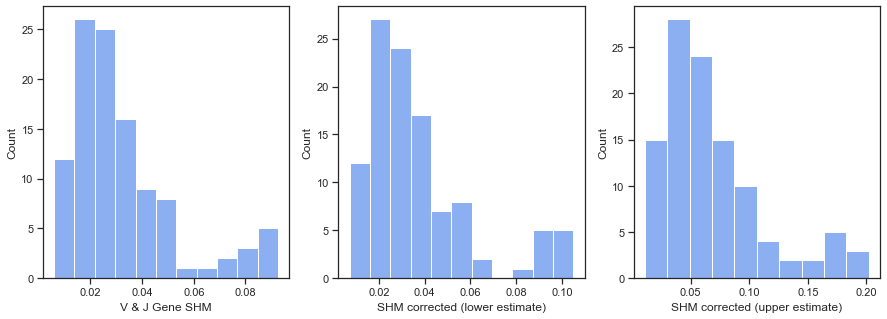

In [8]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=cluster, x="V & J Gene SHM", color="cornflowerblue", ax=ax[0])
sns.histplot(data=cluster, x="SHM corrected (lower estimate)", color="cornflowerblue", ax=ax[1])
sns.histplot(data=cluster, x="SHM corrected (upper estimate)", color="cornflowerblue", ax=ax[2]);

In [9]:
mutation_rates = []

for clone in cluster["Unique Clone Id"].unique():
    mutation_rates.append(cluster[cluster["Unique Clone Id"] == clone]["SHM corrected (upper estimate)"].mean())

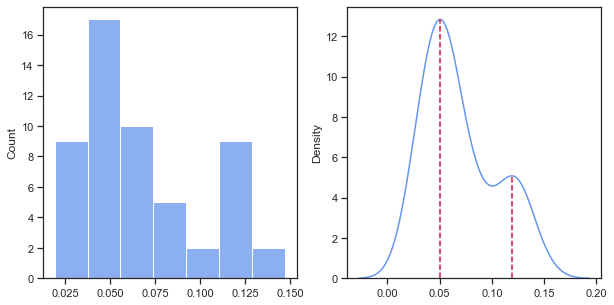

In [10]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(mutation_rates, color="cornflowerblue", ax=ax[0]);
kde_values = sns.kdeplot(mutation_rates, color="cornflowerblue", ax=ax[1]).get_lines()[0].get_data()

x_values, y_values = kde_values[0], kde_values[1]
peaks, _ = find_peaks(y_values, prominence=None)

ax[1].vlines(x_values[peaks[0]], ymin=0, ymax=y_values[peaks[0]], color="crimson", linestyle="--")
ax[1].vlines(x_values[peaks[1]], ymin=0, ymax=y_values[peaks[1]], color="crimson", linestyle="--");

In [11]:
print("Peak 1 at x = %.3f, y = %.3f" %(x_values[peaks[0]], y_values[peaks[0]]))
print("Peak 2 at x = %.3f, y = %.3f" %(x_values[peaks[1]], y_values[peaks[1]]))

ratio = y_values[peaks[0]] / y_values[peaks[1]]
print("Ratio = %.3f / %.3f = %.3f" %(y_values[peaks[0]], y_values[peaks[1]], ratio))
print("Percentage of peak 1 SHM rate: %.3f%%" %(ratio / (ratio+1) * 50)) 
print("Percentage of peak 2 SHM rate: %.3f%%" %(1 / (ratio+1) * 50)) 
# multiply by 50 because we want 50% of clones to be mutated

Peak 1 at x = 0.051, y = 12.842
Peak 2 at x = 0.119, y = 5.083
Ratio = 12.842 / 5.083 = 2.526
Percentage of peak 1 SHM rate: 35.821%
Percentage of peak 2 SHM rate: 14.179%


# Simulation dataframe creation

In [12]:
simulation_df = pd.DataFrame(columns=simulation_input.columns)

for i, row in both_chains.iterrows():

    new_row = {"sequence":row["Full_nucleotide_seq_heavy"], 
               "sequence_aa":translate_to_amino_acid(row["Full_nucleotide_seq_heavy"]), 
               "junction":row["CDRH3_nucleotide_seq"], 
               "junction_aa":translate_to_amino_acid(row["CDRH3_nucleotide_seq"]), # only nucleotide sequence contains the C
               "v_call":row["Gene_name_V_heavy"],
               "j_call":row["Gene_name_J_heavy"],
               "name_repertoire": "Antibody_pairs",
               "sequence_L":row["Full_nucleotide_seq_light"], 
               "sequence_aa_L":translate_to_amino_acid(row["Full_nucleotide_seq_light"]), 
               "junction_L":row["CDRL3_nucleotide_seq"], 
               "junction_aa_L":translate_to_amino_acid(row["CDRL3_nucleotide_seq"]), # only nucleotide sequence contains the C
               "v_call_L":row["Gene_name_V_light"],
               "j_call_L":row["Gene_name_J_light"],
               "cloneId":row["Epitope_ID"]}
    
    simulation_df = simulation_df._append(new_row, ignore_index=True)

# check if all clone IDs are unique 
assert simulation_df["cloneId"].is_unique
# check if all clone IDs are not overlapping with simulated data clone IDs (1 - 10000)    
assert (simulation_df["cloneId"].values > 10000).all()

In [13]:
# adapt dataframe columns

# lower strings in these columns
lower_columns = ["sequence", "junction", "sequence_L", "junction_L"]
for col in lower_columns:
    simulation_df[col] = simulation_df[col].str.lower()

# set these columns to None
none_columns = ["d_call", "np1", "np2", "del_v", "del_d_5", "del_d_3", "del_j", "v_sequence_alignment", 
                "d_sequence_alignment", "j_sequence_alignment", "shm_events", "np1_L", "np2_L", 
                "del_v_L", "del_j_L", "v_sequence_alignment_L", "j_sequence_alignment_L"]
for col in none_columns:
    simulation_df[col] = None

# set these columns to 0
zero_columns = ["freqs", "amount", "L1Begin", "L2Begin", "FR1Begin", "CDR1Begin", "FR2Begin", "CDR2Begin", 
                "FR3Begin", "FR3End", "CDR3Begin", "CDR3End", "FR4Begin", "v_call_end", "L1Begin_L", "L2Begin_L", 
                "FR1Begin_L", "CDR1Begin_L", "FR2Begin_L", "CDR2Begin_L", "FR3Begin_L", "FR3End_L", "CDR3Begin_L",
                "CDR3End_L", "FR4Begin_L", "v_call_end_L", "j_call_start_L", "j_call_end_L"]
for col in zero_columns:
    simulation_df[col] = 0

## Save dataframe

In [14]:
print("Number of antibodies wih both chains:", len(both_chains))
both_chains.to_csv(os.path.dirname(os.getcwd()) + "/data/antibody_pairs/Antibody_pairs_backtranslated_both_chains.csv", 
    index=False)

Number of antibodies wih both chains: 54


In [15]:
print("Number of antibodies for simulation dataset:", len(both_chains))
simulation_df.to_csv(os.path.dirname(os.getcwd()) + "/data/simulation/Repertoire_simulation_input.csv", index=False)

Number of antibodies for simulation dataset: 54
